[COVID-surge](https://github.com/dpploy/covid-surge) [https://github.com/dpploy/covid-surge] : V. F. de Almeida **14May20**

## US States COVID-19 Surge Period Analysis

$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

---
### Table of Contents<a id="toc"></a>
 - [1) Introduction.](#intro)
 - [2) Import COVID-19 data.](#data)
 - [3) Fit model to data.](#fit)
 - [4) Analysis.](#analysis)
---

## [Introduction](#toc)<a id="intro"></a>

On-line COVID-19 data is used in this notebook and a fit to the sigmoid function 
    
\begin{equation*}
\boxed{ f(t) = \frac{\alpha_0}{1 + \alpha_1\, e^{\alpha_2\,t} } }
\end{equation*}
   
is systematically made. The time between points where the function has maximum and minimum curvature is computed and reported as the **surge period**. This period is relevant to public health officials to decide how long measures to control the epidemic should be in place. In addition, the surge period provides insight in comparing how different communities react to the epidemic.

In [2]:
'''Load covid-surge package'''
!pip install --upgrade --quiet covid-surge
from covid_surge import Surge
%matplotlib inline

## [Import Data](#toc)<a id="data"></a>



In [3]:
'''Import data'''

# Get US surge data
us_surge = Surge()

# Set parameters
us_surge.end_date = '4/20/20'   # set end date wanted
us_surge.end_date = None        # get all the data available
us_surge.ignore_last_n_days = 2 # allow for data repo to be corrected/updated
us_surge.min_n_cases_abs = 100  # min # of absolute cases for analysis
us_surge.deaths_100k_minimum = 41 # US death per 100,000 for Chronic Lower Respiratory Diseases per year: 41 (2019)

#****************************************************************************
# Combine all states into a country
#****************************************************************************
print('********************************************************************')
print('*                             US                                   *')
print('********************************************************************')

print('# of states/districts: ',len(us_surge.state_names))
print('# of days:             ',us_surge.dates.shape[0])

********************************************************************
*                             US                                   *
********************************************************************
# of states/districts:  56
# of days:              111


## [Fit Data](#toc)<a id="fit"></a>

In [4]:
'''Fit data to model function'''

# Fit data to all states
fit_data = us_surge.states_fit_data()

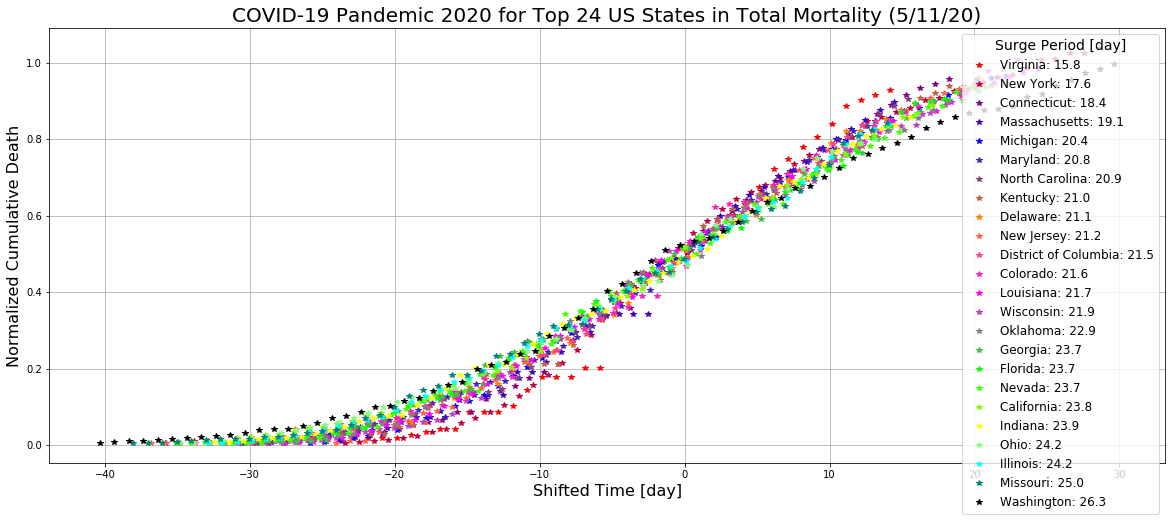

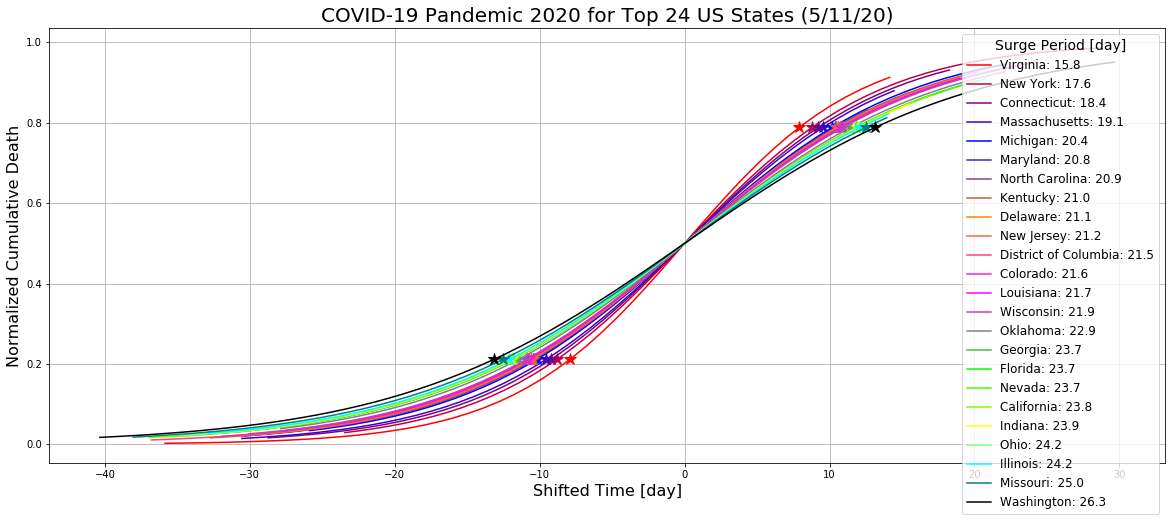

In [5]:
# Plot all data in one plot
us_surge.plot_fit_data( fit_data, 'experimental')
# Plot all fit data in one plot
us_surge.plot_fit_data( fit_data, 'fit' )

## [Analysis](#toc)<a id="analysis"></a>

In [15]:
# Create clustering bins based on surge period
bins = us_surge.clustering(fit_data,2,'surge_period')

print('')
print('*****************************************************************')
print('                             Bins                                ')
print('*****************************************************************')
for k in sorted(bins.keys()):
    print(' Bin %i %s'%(k,bins[k]))

# Use bins to create groups of states based on surge period
state_groups = dict()

for (sort_key,data) in fit_data:
    state = data[0]
    param_vec = data[3]
    tshift = data[4]
    key = us_surge.get_bin_id(sort_key,bins)
    if key in state_groups:
        state_groups[key].append(state)
    else:
        state_groups[key] = list()
        state_groups[key].append(state)


*****************************************************************
                             Bins                                
*****************************************************************
 Bin 0 [15.0, 17.0]
 Bin 1 [17.0, 19.0]
 Bin 2 [19.0, 21.0]
 Bin 3 [21.0, 23.0]
 Bin 4 [23.0, 25.0]
 Bin 5 [25.0, 27.0]


In [16]:
# Create state groups

state_groups = [ state_groups[k] for k in
                  sorted(state_groups.keys(),reverse=False) ]

print('')
print('*****************************************************************')
print('                         Country Groups                          ')
print('*****************************************************************')
for g in state_groups:
    print(' Group %i %s'%(state_groups.index(g),g))


*****************************************************************
                         Country Groups                          
*****************************************************************
 Group 0 ['Virginia']
 Group 1 ['New York', 'Connecticut']
 Group 2 ['Massachusetts', 'Michigan', 'Maryland', 'North Carolina', 'Kentucky']
 Group 3 ['Delaware', 'New Jersey', 'District of Columbia', 'Colorado', 'Louisiana', 'Wisconsin', 'Oklahoma']
 Group 4 ['Georgia', 'Florida', 'Nevada', 'California', 'Indiana', 'Ohio', 'Illinois']
 Group 5 ['Missouri', 'Washington']


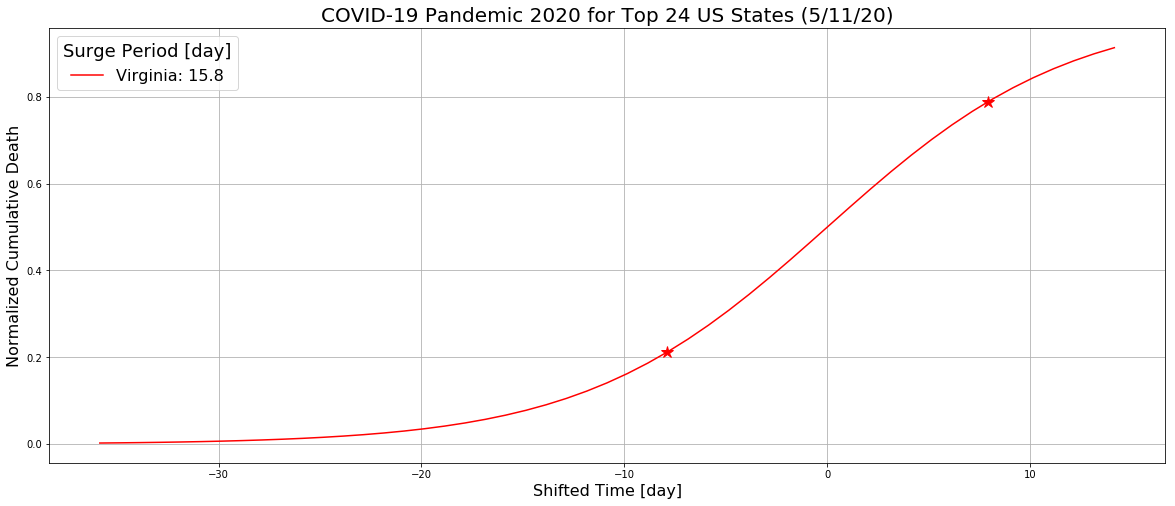

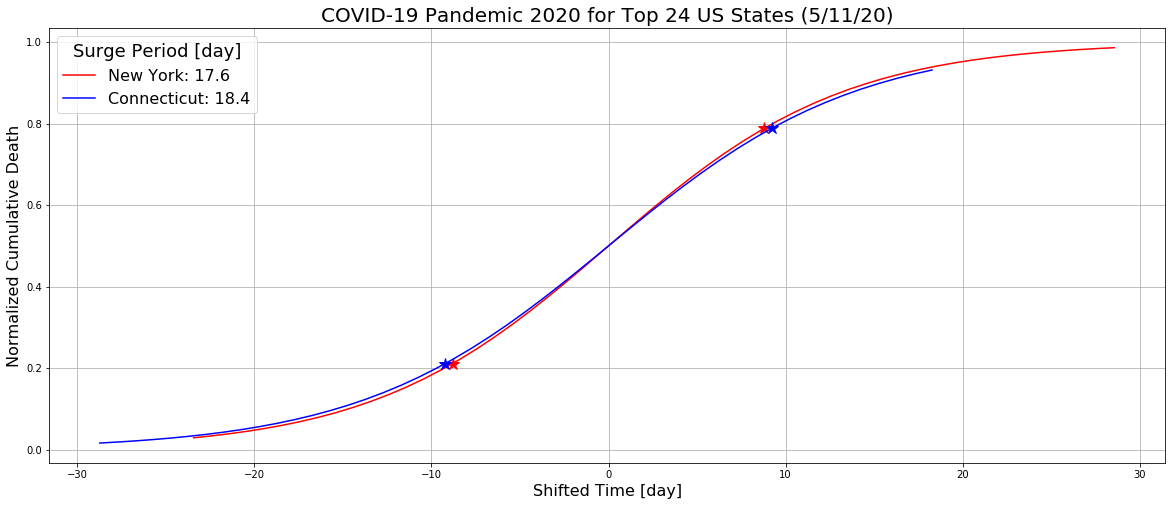

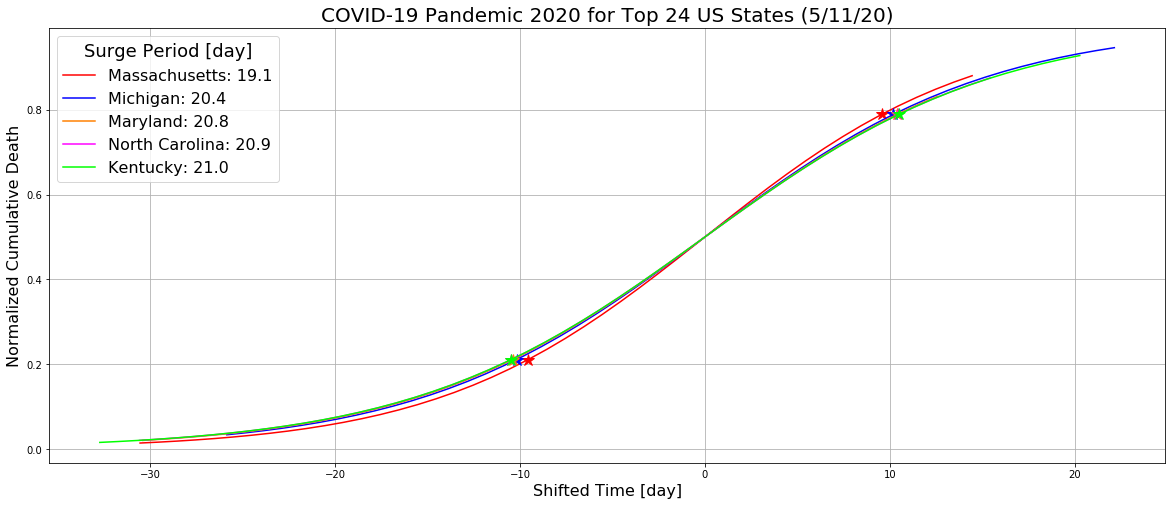

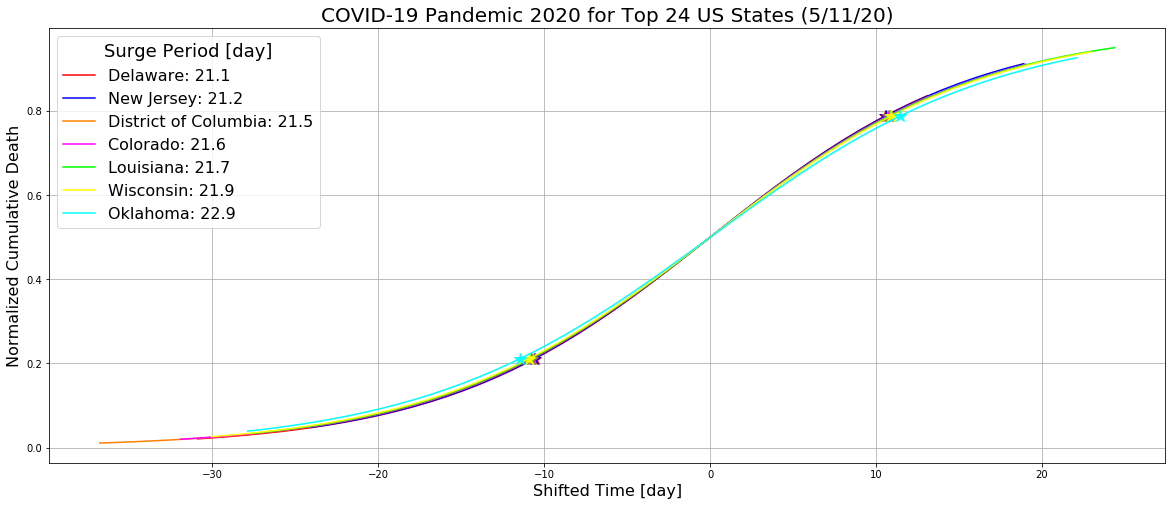

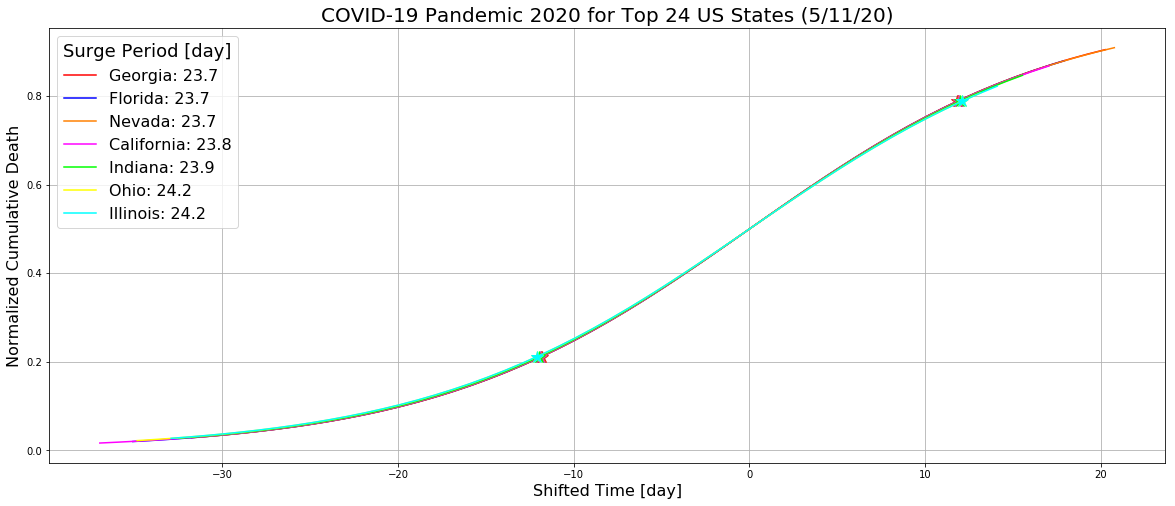

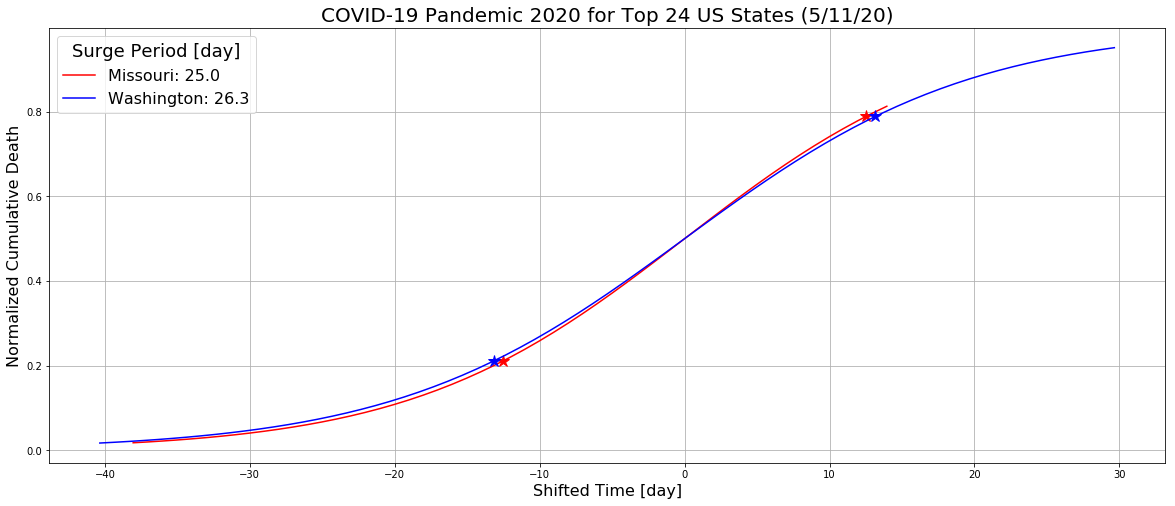

In [19]:
# Plot the normalized surge for groups of states
us_surge.plot_group_fit_data( state_groups, fit_data )

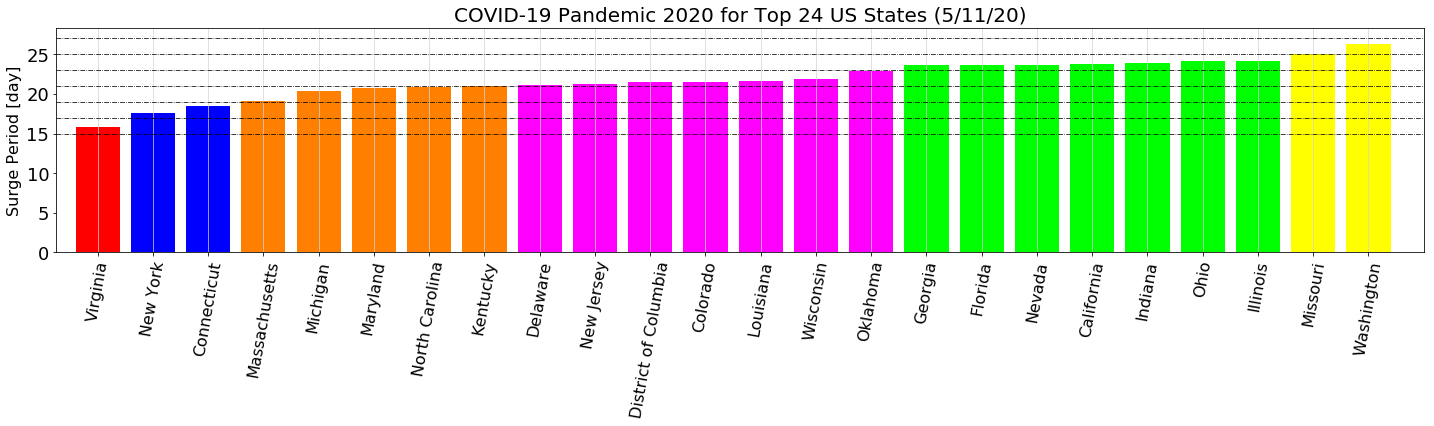

In [20]:
# Plot the surge period for all grouped states
us_surge.plot_group_surge_periods( fit_data, bins )